## Part 1 : Data Analysis , ML Models, PyTorch 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### Data Pre-processing and EDA

In [2]:
## Read the data
data = pd.read_csv("2013_Green_Taxi_Trip_Data_2.csv")
data

,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude
0,2,09/23/2013 10:52:00 AM,09/23/2013 10:52:00 AM,N,1,0.000000,1,0.00,1.8,0.0,0.0,0.25,0.0,NaN,2.05,1,0.000000,0.000000,0.000000
1,1,11/09/2013 12:55:29 AM,11/09/2013 12:55:29 AM,N,1,0.000000,1,0.00,0.0,0.0,0.0,0.00,0.0,NaN,0.00,2,-73.929573,40.754360,0.000000
2,2,09/17/2013 09:45:09 PM,09/17/2013 09:52:20 PM,N,4,0.000000,1,0.00,8.5,0.0,0.5,0.00,0.0,NaN,9.00,2,0.000000,0.000000,0.000000
3,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,N,1,0.000000,1,0.00,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,0.000000,0.000000,0.000000
4,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,N,1,0.000000,1,0.00,2.8,0.0,0.5,0.00,0.0,NaN,3.30,2,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,2,11/22/2013 01:12:23 PM,11/22/2013 01:18:37 PM,N,1,40.799072,1,1.56,7.0,0.0,0.5,0.00,0.0,NaN,7.50,2,-73.952110,40.790028,-73.966728
999995,2,12/07/2013 05:48:54 PM,12/07/2013 06:02:43 PM,N,1,40.756828,1,2.20,11.0,0.0,0.5,0.00,0.0,NaN,11.50,2,-73.890915,40.746941,-73.857140
999996,2,12/11/2013 06:56:57 AM,12/11/2013 07:01:47 AM,N,1,40.812832,1,1.09,6.0,0.0,0.5,0.00,0.0,NaN,6.50,2,-73.950050,40.802143,-73.937943
999997,1,11/04/2013 05:48:17 PM,11/04/2013 06:10:26 PM,N,1,40.676723,2,5.90,21.0,1.0,0.5,0.00,0.0,NaN,22.50,2,-73.831665,40.714417,-73.916199


### Handaling Missing Values and NaN values

In [3]:
## Drop the columns that has only NaN values
data = data.drop(columns=['Ehail_fee'])

### Statistics of Data

In [4]:
data.describe()

,vendor_id,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,Payment_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.789469,1.129071,40.630642,1.555837,2.965233,12.399576,0.354273,0.487042,0.882653,0.136206,14.26043,1.683312,-73.695399,40.647152,-73.677100
std,0.407686,0.843824,2.367405,1.274935,3.010944,16.222033,0.839161,0.080542,2.374339,1.531059,17.12858,0.489801,4.121062,2.272283,4.294177
min,1.000000,1.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,-121.926697,0.000000,-121.927681
25%,2.000000,1.000000,40.733917,1.000000,1.080000,6.500000,0.000000,0.500000,0.000000,0.000000,7.50000,1.000000,-73.953362,40.734240,-73.960449
50%,2.000000,1.000000,40.765480,1.000000,1.970000,9.500000,0.500000,0.500000,0.000000,0.000000,11.00000,2.000000,-73.938416,40.775082,-73.938210
75%,2.000000,1.000000,40.808235,1.000000,3.820000,15.500000,0.500000,0.500000,1.000000,0.000000,17.50000,2.000000,-73.902580,40.810760,-73.896545
max,2.000000,99.000000,42.773968,9.000000,155.000000,9999.990000,679.530000,3.000000,1170.000000,950.000000,10000.99000,4.000000,0.000000,42.699348,0.000000


### Checking for Outliers through Box Plot

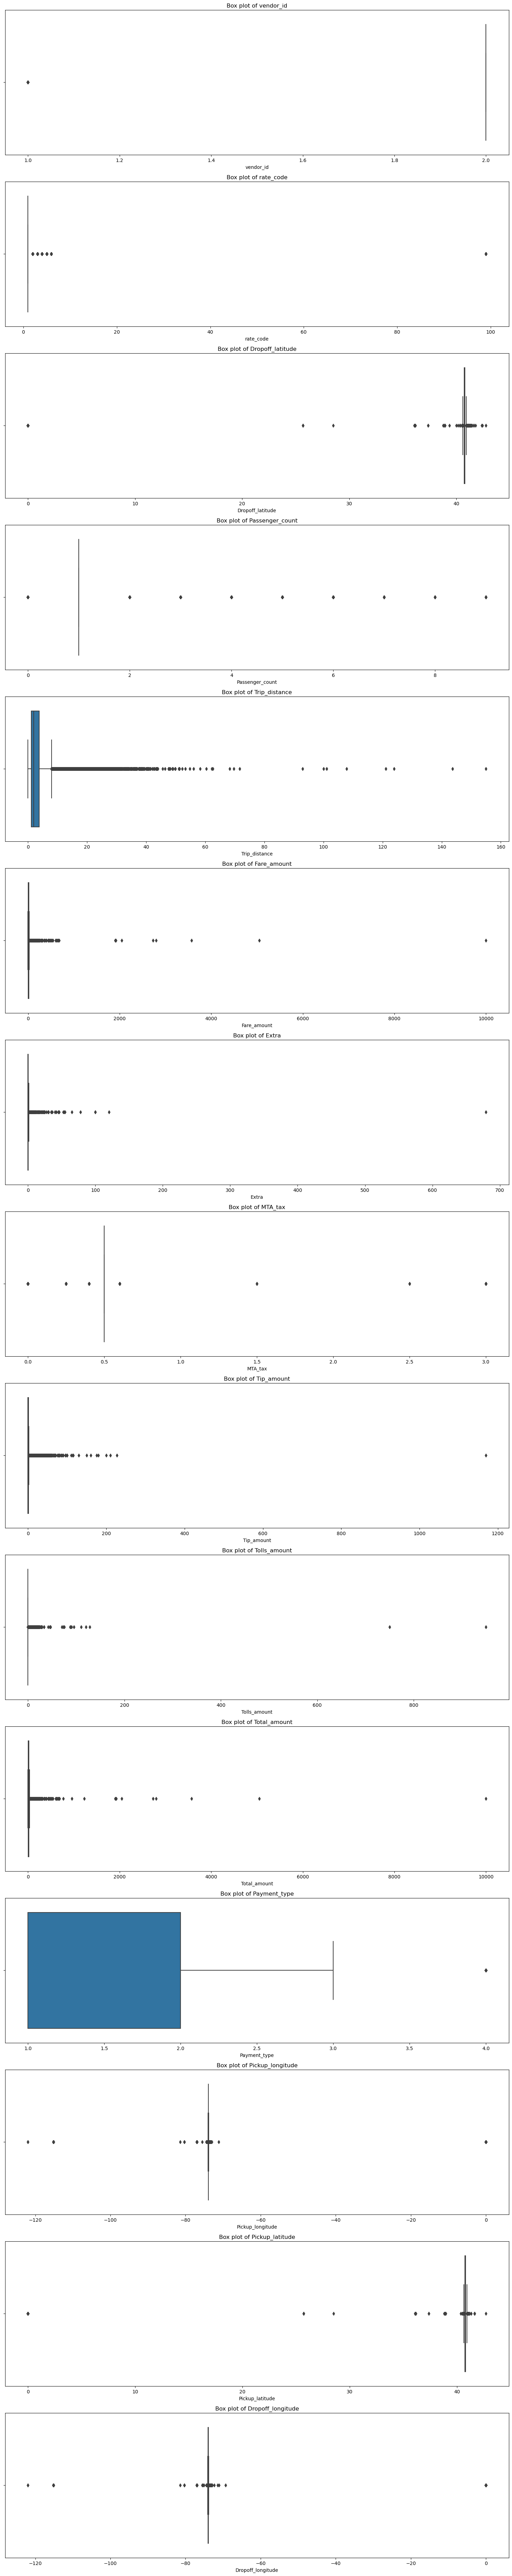

In [5]:
## Visualize if there are any outliers in the data using boxplot

numeric_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


### Bivariate EDA : Relationship between features (pairwise)

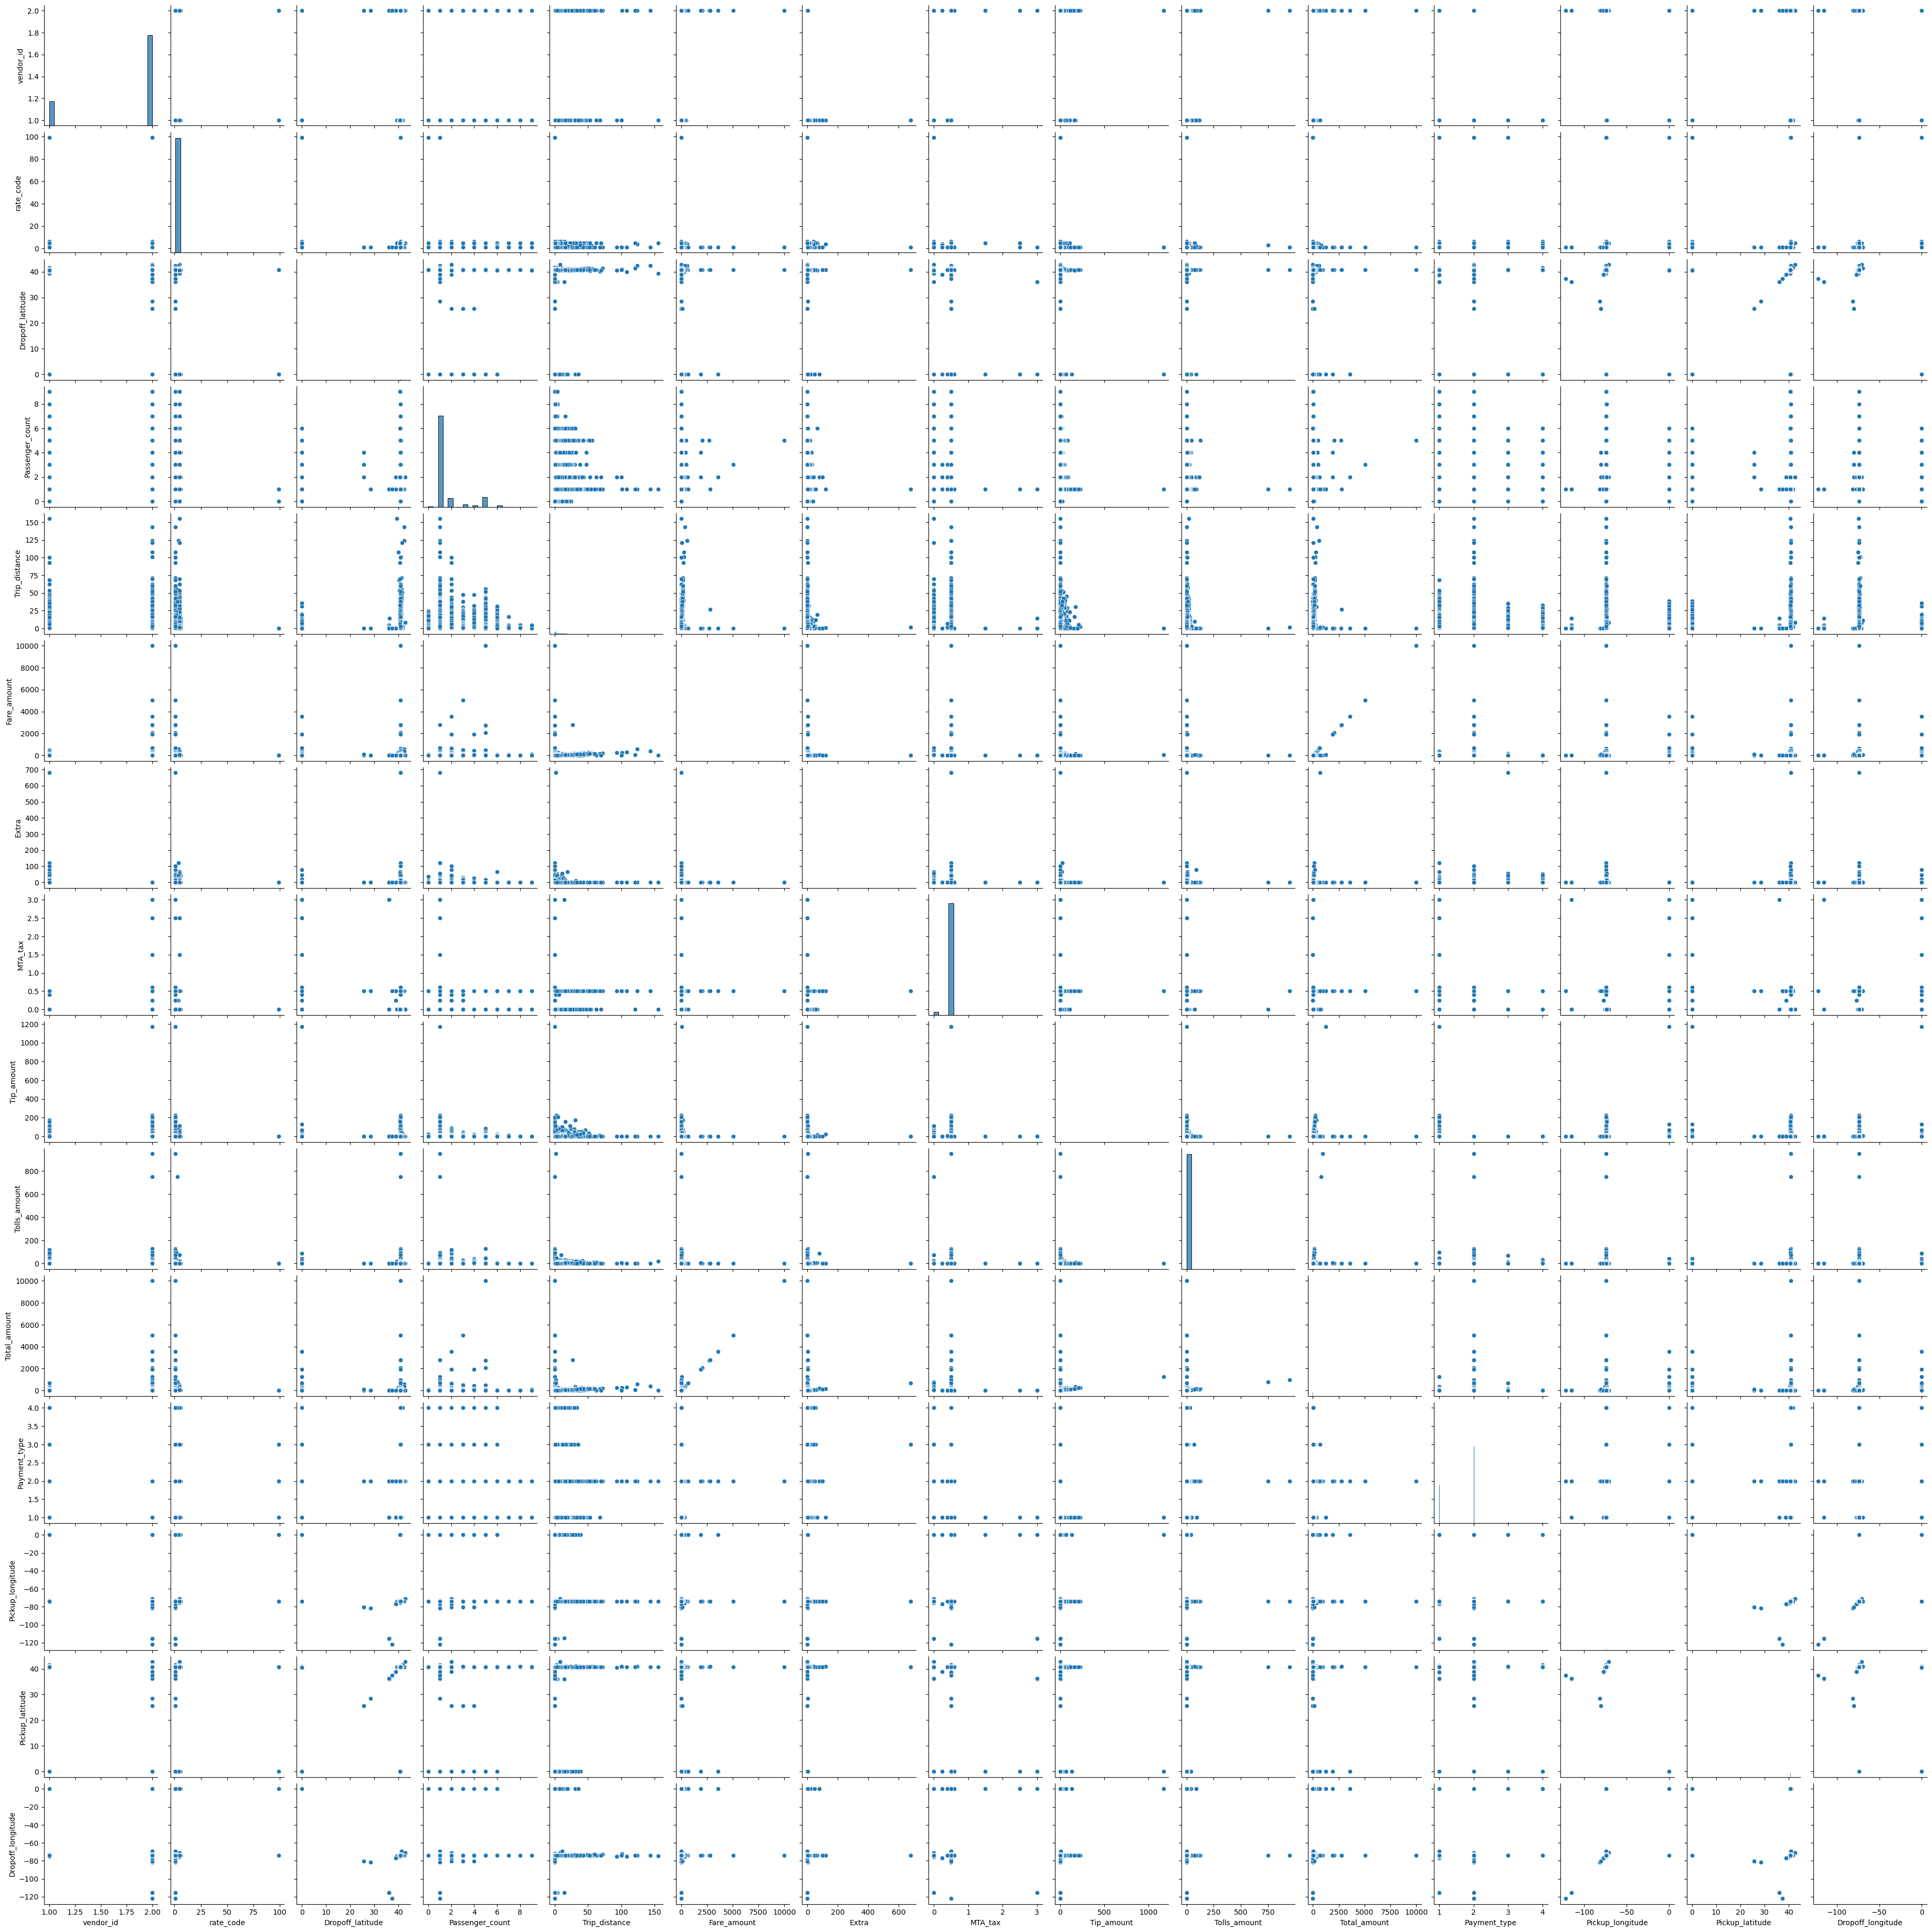

In [6]:
sns.pairplot(data)
plt.show()

### Pie Chart for Cumlative distance travelled for each vendor

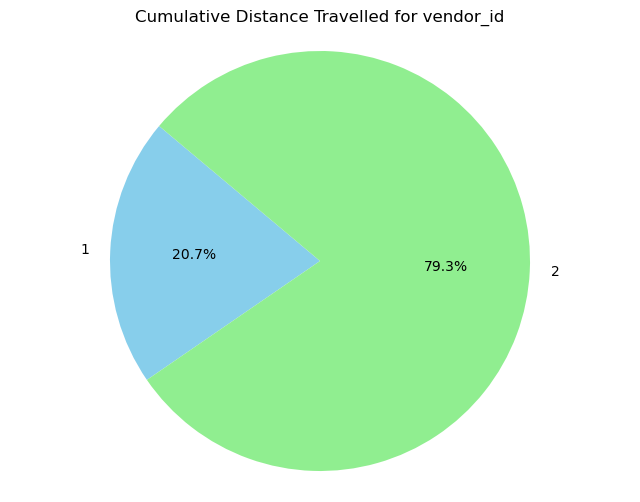

In [7]:
summary = data.groupby('vendor_id')['Trip_distance'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary, labels=summary.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Cumulative Distance Travelled for vendor_id')
plt.axis('equal')
plt.show()

### Bar cahrt for Number of Passangers travelled

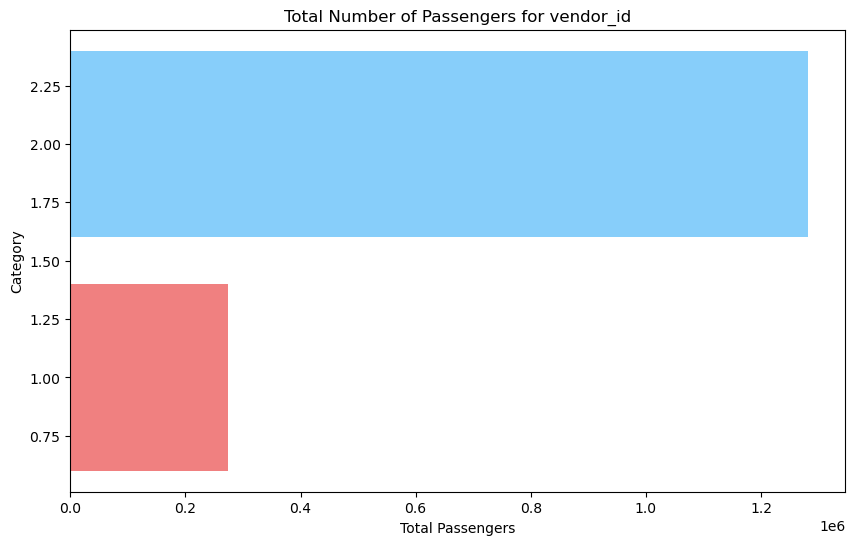

In [8]:
passenger_summary = data.groupby('vendor_id')['Passenger_count'].sum()

plt.figure(figsize=(10, 6))
plt.barh(passenger_summary.index, passenger_summary.values, color=['lightcoral', 'lightskyblue'])
plt.ylabel('Category')
plt.xlabel('Total Passengers')
plt.title('Total Number of Passengers for vendor_id')
plt.show()

### Count of Vendors 

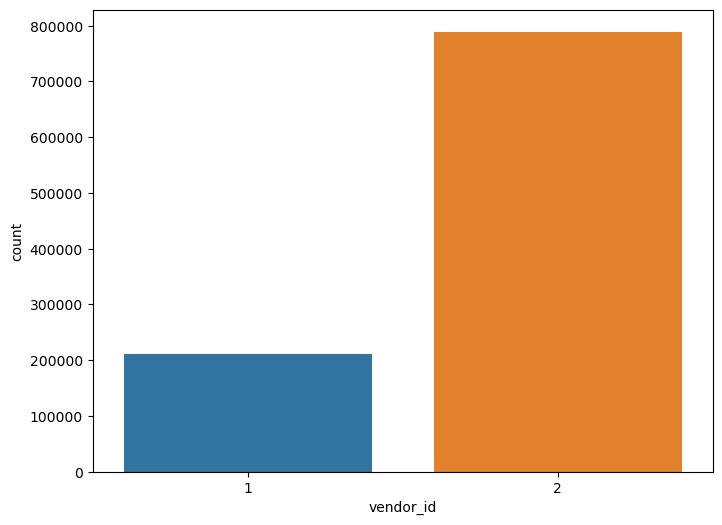

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='vendor_id', data=data)
plt.show()

### Distribution of traget value

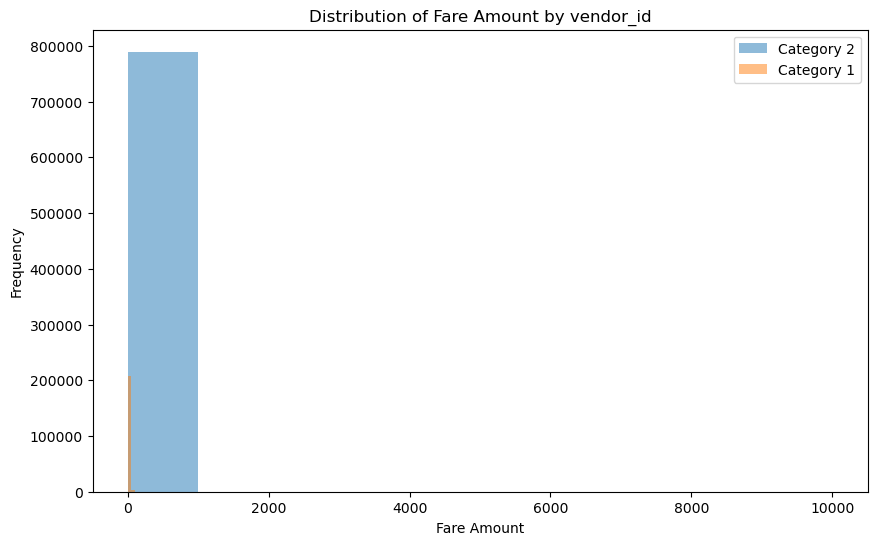

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for category in data['vendor_id'].unique():
    subset = data[data['vendor_id'] == category]
    plt.hist(subset['Fare_amount'], bins=10, alpha=0.5, label=f'Category {category}')

plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount by vendor_id')
plt.legend()
plt.show()

### Multivariate EDA: Selecting relevant Features 

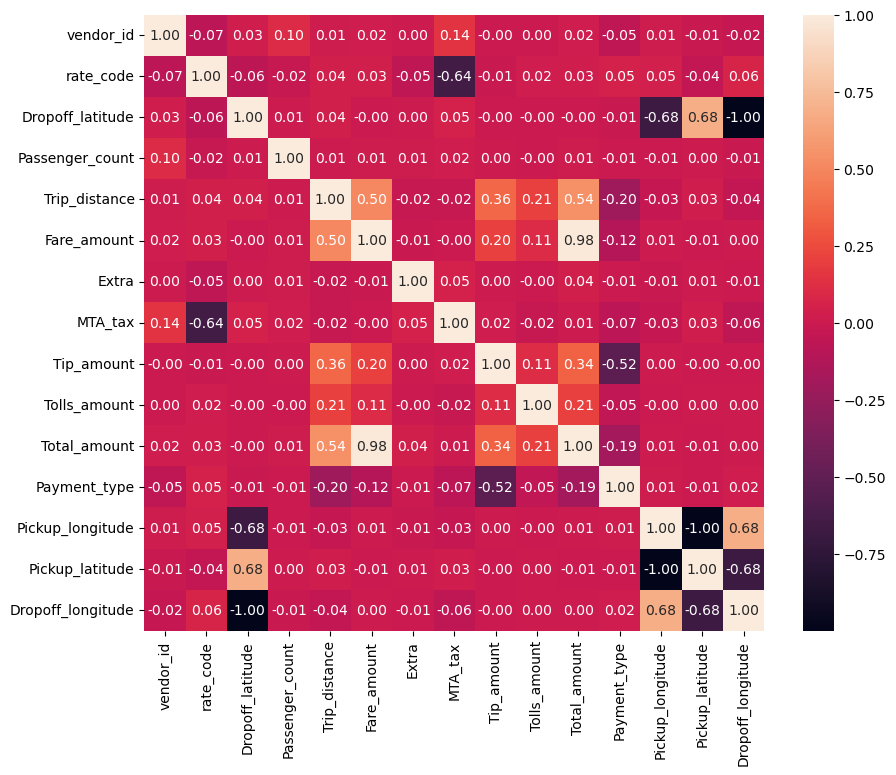

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

### Label Encoding

In [12]:
le = LabelEncoder()
data['Store_and_fwd_flag'] = le.fit_transform(data['Store_and_fwd_flag'])
data

,vendor_id,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Total_amount,Payment_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude
0,2,09/23/2013 10:52:00 AM,09/23/2013 10:52:00 AM,0,1,0.000000,1,0.00,1.8,0.0,0.0,0.25,0.0,2.05,1,0.000000,0.000000,0.000000
1,1,11/09/2013 12:55:29 AM,11/09/2013 12:55:29 AM,0,1,0.000000,1,0.00,0.0,0.0,0.0,0.00,0.0,0.00,2,-73.929573,40.754360,0.000000
2,2,09/17/2013 09:45:09 PM,09/17/2013 09:52:20 PM,0,4,0.000000,1,0.00,8.5,0.0,0.5,0.00,0.0,9.00,2,0.000000,0.000000,0.000000
3,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,0,1,0.000000,1,0.00,2.8,0.0,0.5,0.00,0.0,3.30,2,0.000000,0.000000,0.000000
4,2,10/02/2013 11:17:00 PM,10/02/2013 11:22:54 PM,0,1,0.000000,1,0.00,2.8,0.0,0.5,0.00,0.0,3.30,2,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,2,11/22/2013 01:12:23 PM,11/22/2013 01:18:37 PM,0,1,40.799072,1,1.56,7.0,0.0,0.5,0.00,0.0,7.50,2,-73.952110,40.790028,-73.966728
999995,2,12/07/2013 05:48:54 PM,12/07/2013 06:02:43 PM,0,1,40.756828,1,2.20,11.0,0.0,0.5,0.00,0.0,11.50,2,-73.890915,40.746941,-73.857140
999996,2,12/11/2013 06:56:57 AM,12/11/2013 07:01:47 AM,0,1,40.812832,1,1.09,6.0,0.0,0.5,0.00,0.0,6.50,2,-73.950050,40.802143,-73.937943
999997,1,11/04/2013 05:48:17 PM,11/04/2013 06:10:26 PM,0,1,40.676723,2,5.90,21.0,1.0,0.5,0.00,0.0,22.50,2,-73.831665,40.714417,-73.916199


### Scaling of Data

In [13]:
# Using StandardScaler
scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[data.select_dtypes(include=[float, int]).columns] = scaler.fit_transform(data.select_dtypes(include=[float, int]))

In [14]:
X = df_scaled[['Total_amount','Tolls_amount','Tip_amount','Trip_distance']]
Y = df_scaled['Fare_amount']

### Spliting Data in test and train

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) 

### Applying different ML models

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_val)
lr_mse = mean_squared_error(Y_val, lr_pred)
lr_mae = mean_absolute_error(Y_val, lr_pred)
lr_r2 = r2_score(Y_val, lr_pred)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_val)
dt_mse = mean_squared_error(Y_val, dt_pred)
dt_mae = mean_absolute_error(Y_val, dt_pred)
dt_r2 = r2_score(Y_val, dt_pred)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_val)
rf_mse = mean_squared_error(Y_val, rf_pred)
rf_mae = mean_absolute_error(Y_val, rf_pred)
rf_r2 = r2_score(Y_val, rf_pred)

print("Linear Regression - MSE:", lr_mse, "MAE:", lr_mae, "R²:", lr_r2)
print("Decision Tree Regression - MSE:", dt_mse, "MAE:", dt_mae, "R²:", dt_r2)
print("Random Forest Regression - MSE:", rf_mse, "MAE:", rf_mae, "R²:", rf_r2)

Linear Regression - MSE: 0.0010583515060298497 MAE: 0.02163518403178154 R²: 0.998049054435737
Decision Tree Regression - MSE: 0.010523161154485141 MAE: 0.020369905043646653 R²: 0.9806017996295184
Random Forest Regression - MSE: 0.006828708679419709 MAE: 0.02008695932954575 R²: 0.9874120848963174


### Plotting Actual values and Predicted Values

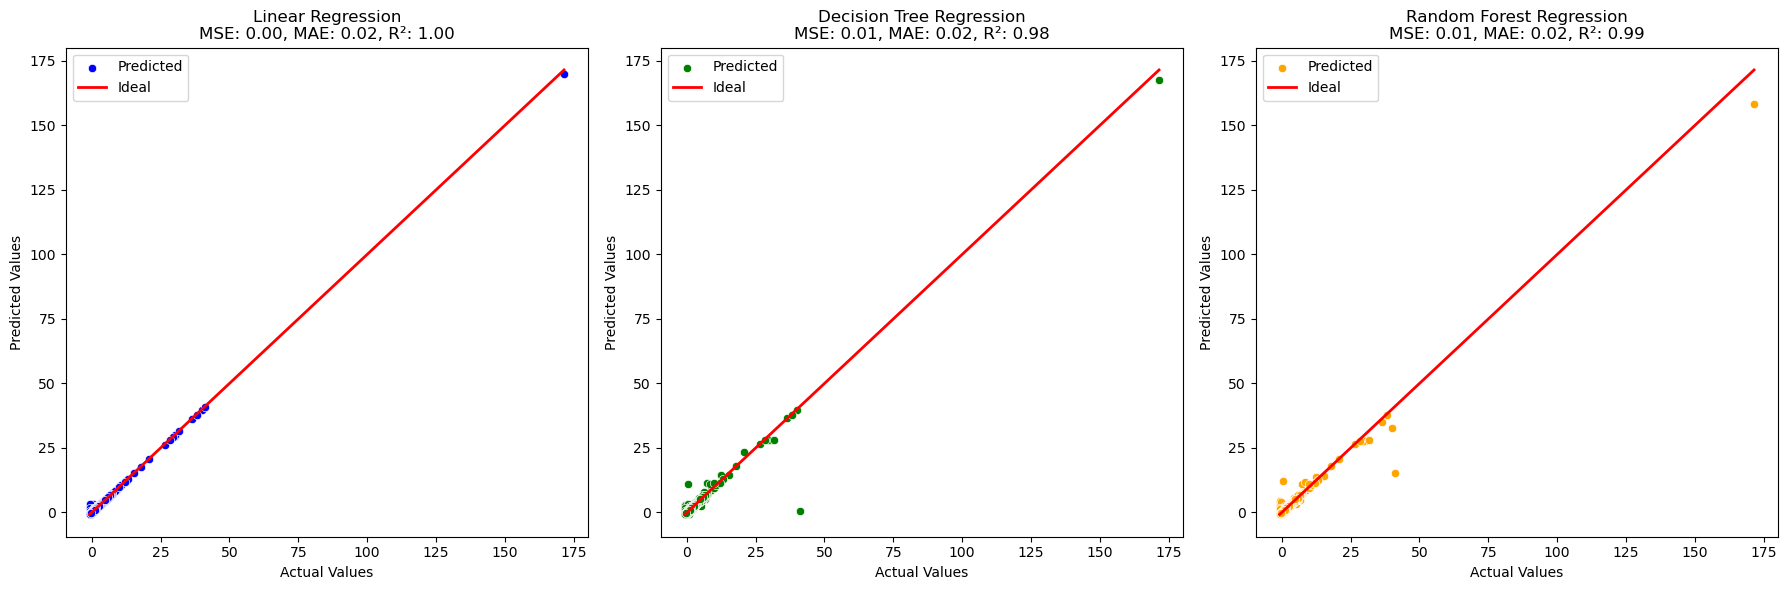

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.scatterplot(x=Y_val, y=lr_pred, color="blue", label="Predicted")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', lw=2, label="Ideal")
plt.title(f"Linear Regression\nMSE: {lr_mse:.2f}, MAE: {lr_mae:.2f}, R²: {lr_r2:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.subplot(132)
sns.scatterplot(x=Y_val, y=dt_pred, color="green", label="Predicted")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', lw=2, label="Ideal")
plt.title(f"Decision Tree Regression\nMSE: {dt_mse:.2f}, MAE: {dt_mae:.2f}, R²: {dt_r2:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.subplot(133)
sns.scatterplot(x=Y_val, y=rf_pred, color="orange", label="Predicted")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', lw=2, label="Ideal")
plt.title(f"Random Forest Regression\nMSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()
plt.show()

### Model comparison

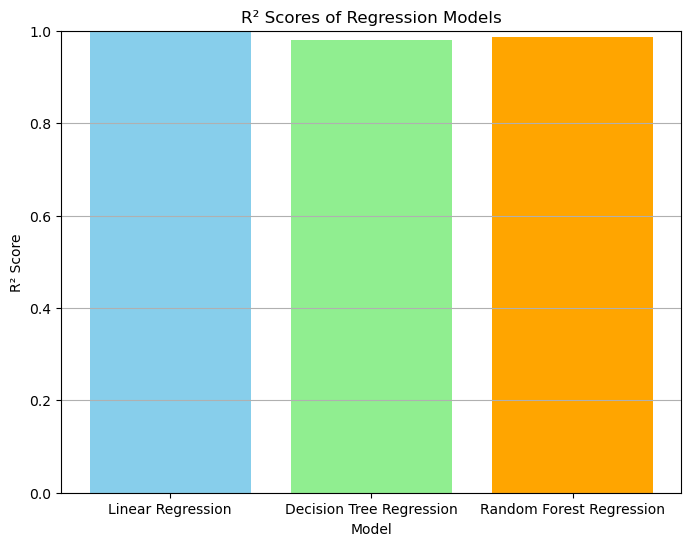

In [18]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
r2_values = [lr_r2, dt_r2, rf_r2]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Scores of Regression Models')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()

## PyTorch Tutorial

In [19]:
import torch
import numpy as np

### Tensor Initialization
- Directly from data

In [20]:
data = [[1,4],[2,3]]
x_data = torch.tensor(data)
x_data

tensor([[1, 4],
        [2, 3]])

- From a NumPy array

In [21]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 4],
        [2, 3]])

- From another Tensor

In [22]:
# retains the properties of x_data
x_ones = torch.ones_like(x_data) 
print(f"Ones Tensor: \n {x_ones} \n")

# overrides the datatype of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float) 
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9495, 0.9312],
        [0.9126, 0.9616]]) 



- With random or constant values:



In [23]:
shape = (2, 3,)
random_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {random_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7380, 0.8228, 0.2336],
        [0.9731, 0.4142, 0.3092]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes
- Describing shape, datatype and device where the tensor is stored



In [24]:
tensor = torch.rand(3, 4)

print(f"Shape of the tensor: {tensor.shape}")
print(f"Datatype of the tensor: {tensor.dtype}")
print(f"The device tensor is stored on: {tensor.device}")

Shape of the tensor: torch.Size([3, 4])
Datatype of the tensor: torch.float32
The device tensor is stored on: cpu


### Tensor Operations
- Moving tensor on GPU if available



In [25]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")


- Standard numpy-like indexing and slicing:



In [26]:
tensor = torch.ones(4, 4)
tensor[:,2] = 0
print(tensor)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


- Joining tensors



In [27]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.]])


- Multiplying tensors



In [28]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]]) 

tensor * tensor 
 tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


In [29]:
# Matrix multiplication between two tensors
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [30]:
print(tensor, "\n")
tensor.add_(8)
print(tensor)


tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]]) 

tensor([[9., 9., 8., 9.],
        [9., 9., 8., 9.],
        [9., 9., 8., 9.],
        [9., 9., 8., 9.]])



### Bridge with NumPy
- Tensor to NumPy array



In [31]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [32]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


- NumPy array to Tensor

In [33]:
n = np.ones(5)
t = torch.from_numpy(n)

In [34]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### Introduction to torch.autograd

### Usage in Pytorch

In [35]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

- forward pass

In [36]:
prediction = model(data)

- Calculate the error and backpropogate the error through networks

In [37]:
loss = (prediction - labels).sum()
loss.backward() 

- Loading an optimizer 

In [38]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

- Initiate Gradient Descent

In [39]:
optim.step() 

### Differentiation in Autograd

In [40]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [41]:
Q = 3*a**3 - b**2

- Finding the differentiation of Q

In [42]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

- Check with manual calculations if the gradients are correct

In [43]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Exclusion from the DAG

In [44]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


- Frozen Parameters

In [45]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

- Adding new layer

In [46]:
model.fc = nn.Linear(512, 10)

- Optimize the model

In [47]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

### Neural Network

- Define the network

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


- Parameters of the model

In [49]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [50]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0089,  0.0522, -0.0953,  0.1068,  0.0665,  0.0817, -0.0714, -0.0953,
         -0.0548,  0.0290]], grad_fn=<AddmmBackward0>)


In [51]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [52]:
output = net(input)
target = torch.randn(10)  
target = target.view(1, -1)  
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3776, grad_fn=<MseLossBackward0>)


- Backward propogation

In [53]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### BackProp

In [54]:
net.zero_grad()    

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0111,  0.0128,  0.0174, -0.0148, -0.0009, -0.0072])


### Update weights

In [55]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

- Using various update rules

In [56]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

### Training a Classifier

In [57]:
import torch
import torchvision
import torchvision.transforms as transforms

- Normalizing the images

In [58]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


- Visualizing the training images

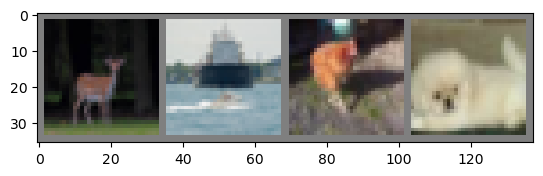

deer  ship  bird  dog  


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Defining a Convolutional Neural Network

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss Function and Optimizer

In [61]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the Network

In [62]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.168
[1,  4000] loss: 1.818
[1,  6000] loss: 1.687
[1,  8000] loss: 1.575
[1, 10000] loss: 1.515
[1, 12000] loss: 1.450
[2,  2000] loss: 1.377
[2,  4000] loss: 1.349
[2,  6000] loss: 1.346
[2,  8000] loss: 1.304
[2, 10000] loss: 1.308
[2, 12000] loss: 1.270
Finished Training


- Saving the trained model

In [63]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Testing the model on test data

- Visualizing the test images

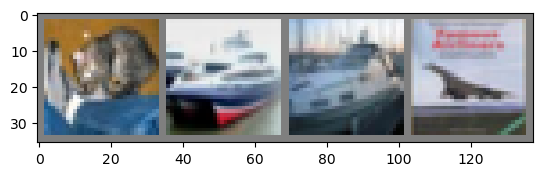

GroundTruth:  cat   ship  ship  plane


In [64]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

- Loading the saved model

In [65]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Predicting these test images on model

In [66]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   plane truck ship 


#### Checking the model on entire test data

In [67]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


#### Checking the accuray of the model for different labels / classes

In [68]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.4 %
Accuracy for class: car   is 60.7 %
Accuracy for class: bird  is 47.8 %
Accuracy for class: cat   is 43.8 %
Accuracy for class: deer  is 49.7 %
Accuracy for class: dog   is 26.2 %
Accuracy for class: frog  is 73.4 %
Accuracy for class: horse is 54.3 %
Accuracy for class: ship  is 59.0 %
Accuracy for class: truck is 66.6 %


### Different set of parameters for the trained classifier

- With more number of layers

In [69]:
import torch.nn as nn
import torch.nn.functional as F

class NetMoreLayers(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_more_layers = NetMoreLayers()
optimizer = torch.optim.Adam(net_more_layers.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(2): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999: 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.196
[1,  4000] loss: 1.200
[1,  6000] loss: 1.193
[1,  8000] loss: 1.209
[1, 10000] loss: 1.187
[1, 12000] loss: 1.170
[2,  2000] loss: 1.187
[2,  4000] loss: 1.203
[2,  6000] loss: 1.204
[2,  8000] loss: 1.164
[2, 10000] loss: 1.192
[2, 12000] loss: 1.205
Finished Training


- With ReLU activation function

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NetReLU(nn.Module):
    def __init__(self):
        super(NetReLU, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_relu = NetReLU()

optimizer = torch.optim.SGD(net_relu.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


for epoch in range(2):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999: 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

def evaluate_model(model, testloader):
    correct = 0
    total = 0
    model.eval() 
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy


accuracy = evaluate_model(net_relu, testloader)
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')


[1,  2000] loss: 2.087
[1,  4000] loss: 1.959
[1,  6000] loss: 1.931
[1,  8000] loss: 1.959
[1, 10000] loss: 1.958
[1, 12000] loss: 1.961
[2,  2000] loss: 2.043
[2,  4000] loss: 1.992
[2,  6000] loss: 1.999
[2,  8000] loss: 1.995
[2, 10000] loss: 1.982
[2, 12000] loss: 1.970
Finished Training
Accuracy of the network on the 10000 test images: 28.46%


- With RMS optimizer

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NetRMSprop(nn.Module):
    def __init__(self):
        super(NetRMSprop, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_rmsprop = NetRMSprop()

optimizer = torch.optim.RMSprop(net_rmsprop.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net_rmsprop(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


def evaluate_model(model, testloader):
    correct = 0
    total = 0
    model.eval()  #
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy


accuracy = evaluate_model(net_rmsprop, testloader)
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')


[1,  2000] loss: 1.849
[1,  4000] loss: 1.580
[1,  6000] loss: 1.497
[1,  8000] loss: 1.413
[1, 10000] loss: 1.388
[1, 12000] loss: 1.320
[2,  2000] loss: 1.300
[2,  4000] loss: 1.247
[2,  6000] loss: 1.248
[2,  8000] loss: 1.216
[2, 10000] loss: 1.208
[2, 12000] loss: 1.201
Finished Training
Accuracy of the network on the 10000 test images: 59.96%


### Shallow NN for my Part I problem that is predicting fare amount for taxi trips

In [72]:
X_np = X.to_numpy().astype(np.float32)
Y_np = Y.to_numpy().astype(np.float32)

### Pre Processing Data

In [73]:
import torch
from torch.utils.data import DataLoader, TensorDataset


X_tensor = torch.tensor(X_np)
y_tensor = torch.tensor(Y_np)

print(f'X_tensor shape: {X_tensor.shape}')
print(f'y_tensor shape: {y_tensor.shape}')


dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


X_tensor shape: torch.Size([999999, 4])
y_tensor shape: torch.Size([999999])


### Defining the Neural Network

In [74]:
class Fare_Amount_Neural_Net(nn.Module):
    def __init__(self):
        super(Fare_Amount_Neural_Net, self).__init__()
        self.hidden = nn.Linear(4, 50)
        self.output = nn.Linear(50, 1)  

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

model = Fare_Amount_Neural_Net()

### Defining Optimizer

In [75]:
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Training And Evaluation

Epoch [1/10], Loss: 1.0021
Epoch [2/10], Loss: 1.0013
Epoch [3/10], Loss: 1.0003
Epoch [4/10], Loss: 0.9994
Epoch [5/10], Loss: 0.9991
Epoch [6/10], Loss: 0.9991
Epoch [7/10], Loss: 0.9992
Epoch [8/10], Loss: 0.9991
Epoch [9/10], Loss: 0.9991
Epoch [10/10], Loss: 0.9991


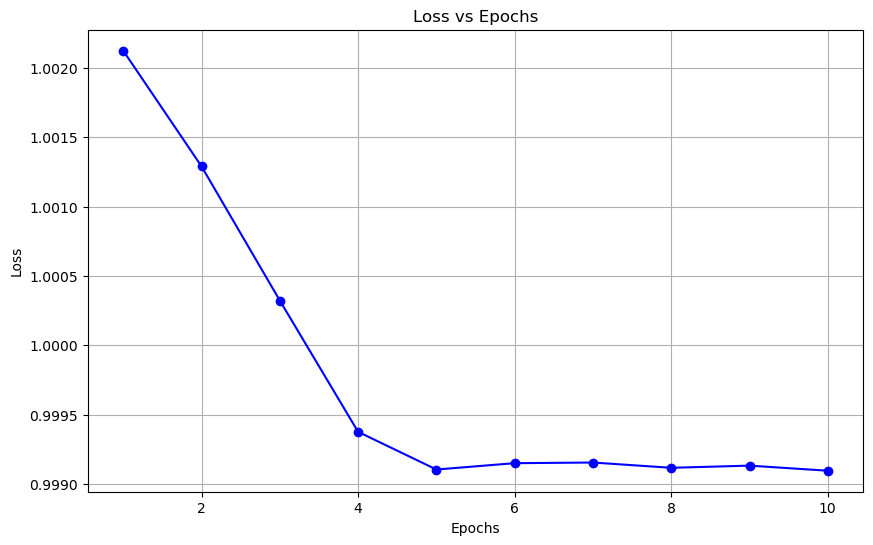

In [76]:
import matplotlib.pyplot as plt

num_epochs = 10
loss_values = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in dataloader:

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
        epoch_loss += loss.item()
    
    epoch_loss /= len(dataloader)
    loss_values.append(epoch_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
